In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'G:\8TH SEMESTER\MACHINE_LEARNING(T+L)\LAB_ML\checkpoint\LAB_13\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'G:\8TH SEMESTER\MACHINE_LEARNING(T+L)\LAB_ML\CVS_DS\train'
validation_dir = r'G:\8TH SEMESTER\MACHINE_LEARNING(T+L)\LAB_ML\CVS_DS\validation'
test_dir = r'G:\8TH SEMESTER\MACHINE_LEARNING(T+L)\LAB_ML\CVS_DS\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [11]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

In [12]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [13]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 5,
                         callbacks = callbacks)

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 0.8380 - acc: 0.5556
Epoch 1: val_loss improved from inf to 0.97660, saving model to G:\8TH SEMESTER\MACHINE_LEARNING(T+L)\LAB_ML\checkpoint\LAB_13\E1-cp-0001-loss0.98.h5
50/50 [==============================] - 245s 5s/step - loss: 0.8380 - acc: 0.5556 - val_loss: 0.9766 - val_acc: 0.6042
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 0.6940 - acc: 0.6913
Epoch 2: val_loss improved from 0.97660 to 0.61469, saving model to G:\8TH SEMESTER\MACHINE_LEARNING(T+L)\LAB_ML\checkpoint\LAB_13\E1-cp-0002-loss0.61.h5
50/50 [==============================] - 263s 5s/step - loss: 0.6940 - acc: 0.6913 - val_loss: 0.6147 - val_acc: 0.6875
Epoch 3/5
50/50 [==============================] - ETA: 0s - loss: 0.4798 - acc: 0.7669
Epoch 3: val_loss improved from 0.61469 to 0.38858, saving model to G:\8TH SEMESTER\MACHINE_LEARNING(T+L)\LAB_ML\checkpoint\LAB_13\E1-cp-0003-loss0.39.h5
50/50 [==============================]

In [14]:
model_history.history

{'loss': [0.8380208611488342,
  0.6940462589263916,
  0.47980570793151855,
  0.47295311093330383,
  0.396355539560318],
 'acc': [0.5556250214576721,
  0.6912500262260437,
  0.7668750286102295,
  0.7806249856948853,
  0.8149999976158142],
 'val_loss': [0.976599395275116,
  0.6146857142448425,
  0.3885824680328369,
  0.3540705740451813,
  0.9640612602233887],
 'val_acc': [0.6041666865348816,
  0.6875,
  0.7552083134651184,
  0.8020833134651184,
  0.65625]}

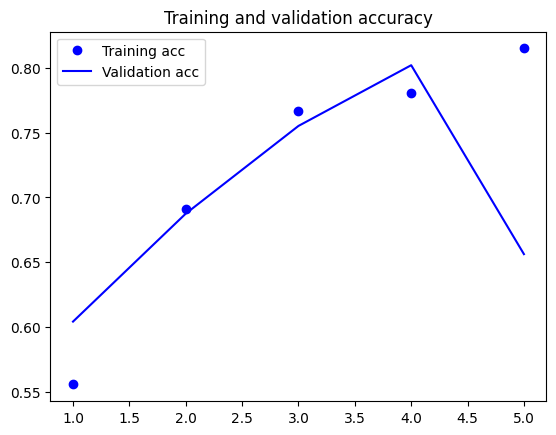

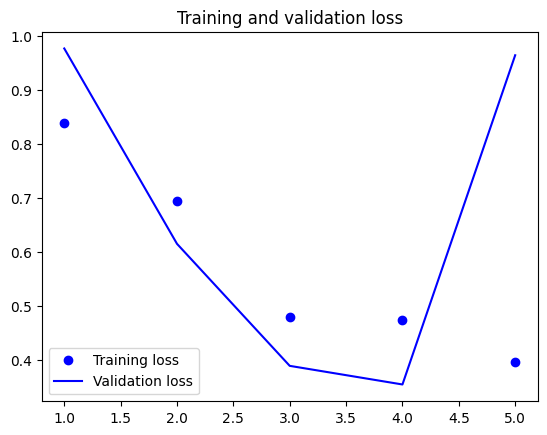

<Figure size 640x480 with 0 Axes>

In [15]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'G:\8TH SEMESTER\MACHINE_LEARNING(T+L)\LAB_ML\CVS_DS\model_Accuracy.png')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 9s 1s/step


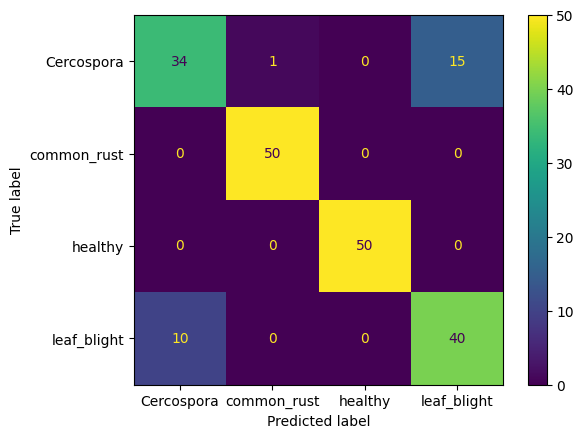

In [16]:
model = load_model(r'G:\8TH SEMESTER\MACHINE_LEARNING(T+L)\LAB_ML\checkpoint\LAB_13\E1-cp-0004-loss0.35.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [17]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.77      0.68      0.72        50
 common_rust       0.98      1.00      0.99        50
     healthy       1.00      1.00      1.00        50
 leaf_blight       0.73      0.80      0.76        50

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

